In [148]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib
import glob,os 
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import matplotlib.cm as cmx
import matplotlib as mpl

mpl.rc('lines', linewidth=2)
mpl.rc('axes', labelsize=16, titlesize=16)
mpl.rc('figure', titlesize=20)
mpl.rc('font', size=14)  # global font size
mpl.rc('legend', fontsize=14, fancybox=True)
mpl.rc('xtick.major', size=6)
mpl.rc('xtick.minor', size=4)
mpl.rcParams['font.size'] = 14.0

def set_tick_font_size(axes, font_size):
    def __set_axis_tick(axis):
        for tick in axis.xaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)
        for tick in axis.yaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)
    if hasattr(axes, '__iter__'):
        for axis in axes:
            __set_axis_tick(axis)
    else:
        __set_axis_tick(axes)

def tsne_plot(x_pred_encoded, y_train,cmap="jet", clabel="Virus type"):
    Dmax = y_train;
    [n,s] = np.histogram(Dmax, 11);
    d = np.digitize(Dmax, s);
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    set_tick_font_size(ax, 14)
    cmi = plt.get_cmap(cmap);
    cNorm = mpl.colors.Normalize(vmin=min(Dmax), vmax=max(Dmax));
    scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cmi);
    
    #cov2:  [6615] [[-6.932281  -2.0951266]] [[-7.1377892 -2.4586005]]
    #mers:  [2482] [[26.98586  19.235018]] [[27.346714 19.146008]]
    #sars:  [1375] [[-21.632055   -7.0641994]] [[-21.632055   -7.0641994]]
    ax.scatter([-6.932281],  [-2.0951266], c=scalarMap.to_rgba([0]), marker='*',s=500)
    ax.scatter([26.98586],  [19.235018], c=scalarMap.to_rgba([1]), marker='*',s=500)
    ax.scatter([-21.632055],   [-7.0641994], c=scalarMap.to_rgba([2]), marker='*',s=500)

    x = x_pred_encoded[:,0]
    y = x_pred_encoded[:,1]
    
    ax.scatter(x, y, c=scalarMap.to_rgba(Dmax), marker="o", s=1, alpha=0.5)
    ax.set_xlabel("$t_1$", fontsize=14)
    ax.set_ylabel("$t_2$", fontsize=14)
    scalarMap.set_array(Dmax);
    cbar = plt.colorbar(scalarMap);
    cbar.ax.tick_params(labelsize=14) 
    

    
    if clabel=="Virus type":
        cbar.set_ticks([0,1,2])
        cbar.set_ticklabels(["COV2", "MERS", "SARS"])
    else:
        cbar.set_label(label=clabel,fontsize=14)
    plt.savefig('2d_tsne_full_%s.png'%clabel,format='png',dpi=300, bbox_inches='tight')
    plt.show()
    
    
def plot_loss(folder='./', start=3):
    fig, ax = plt.subplots()
    files = sorted(glob.glob(os.path.join(folder, 'loss-*')))
    for file in [*files[1:],files[0]]:
        loss = np.load(file)
        train_loss = loss['train_loss']
        val_loss = loss['val_loss']
        dim = file.split('-')[-1].split('.')[0]
        print(file,dim)
        epochs = list(range(1,train_loss.shape[0]+1))
        ax.plot(epochs[start:], train_loss[start:], label='train-%s'%dim, marker='o', markersize=5)
        ax.plot(epochs[start:], val_loss[start:], label='val-%s'%dim, marker='o', markersize=5)
    ax.set(xlabel='Epoch', ylabel='Loss',)
           #title='CVAE training on remd_00')
    leg = ax.legend(fontsize=12)
    leg.get_frame().set_linewidth(0.0)
    plt.savefig('loss_vs_epoch.png',format='png',dpi=300, bbox_inches='tight') 
    
    
def scatter3d(x,y,z, cs, cmap='jet',clabel="RMSD($\AA$)"):
    cm = plt.get_cmap(cmap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    ax.set_xlabel("$z_1$",fontsize=12)
    ax.set_ylabel("$z_2$",fontsize=12) 
    ax.set_zlabel("$z_3$",fontsize=12)     
    scalarMap.set_array(cs)
    cbar = fig.colorbar(scalarMap)
    if clabel=="Virus Type":
        cbar.set_ticks([0,1,2])
        cbar.set_ticklabels(["COV2", "MERS", "SARS"])
    else:
        cbar.set_label(label=clabel,fontsize=14)
    plt.savefig('cvae-embedding.png',format='png',dpi=300, bbox_inches='tight')
        

sindhu/project1_aligned/24x24/results\loss-d3.npz d3
sindhu/project1_aligned/24x24/results\loss-d5.npz d5
sindhu/project1_aligned/24x24/results\loss-d7.npz d7
sindhu/project1_aligned/24x24/results\loss-d9.npz d9
sindhu/project1_aligned/24x24/results\loss-d11.npz d11


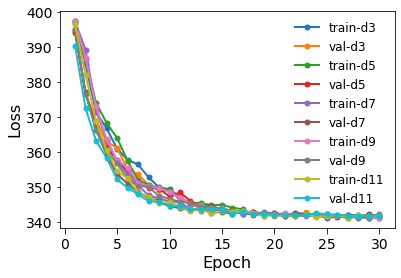

In [39]:
plot_loss('sindhu/project1_aligned/24x24/results', 0)

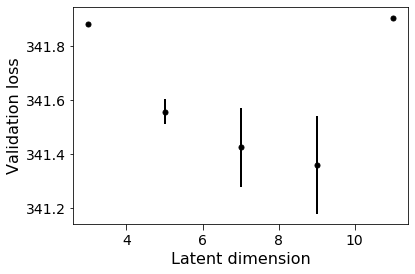

In [37]:
data = np.load('sindhu/project1_aligned/24x24/results/loss_vs_latentD.npy')
fig, ax = plt.subplots()
ax.errorbar(data[:,0], data[:,1], yerr =data[:,2], marker='o', color='black', linestyle='None', markersize=5)
ax.set(xlabel='Latent dimension', ylabel='Validation loss',title='')
plt.savefig('loss_vs_latentD.png',format='png',dpi=300, bbox_inches='tight')

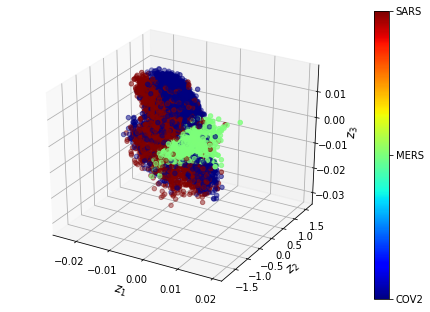

In [54]:
import pandas as pd
label = pd.read_csv('label_val.txt', header=None, delim_whitespace=True).iloc[:, 0]
cm_emb = np.load('sars-mers-cov2-embeddings.npy', 'r')
cm_emb = np.squeeze(cm_emb)
start=0 
end=cm_emb.shape[0]
scatter3d(cm_emb[start:end,0], cm_emb[start:end,1], 
          cm_emb[start:end,2], label[start:end], clabel="Virus Type")

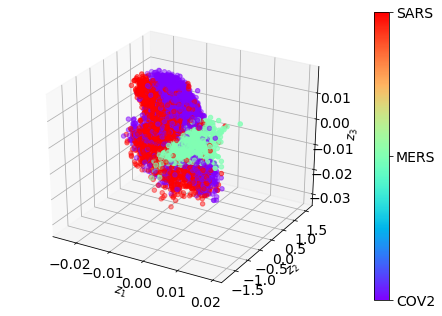

In [168]:
scatter3d(cm_emb[start:end,0], cm_emb[start:end,1], 
          cm_emb[start:end,2], label[start:end], cmap="rainbow" , clabel="Virus Type")

In [55]:
cm_emb.shape

(10000, 7)

Text(0.5, 1.0, 'pred')

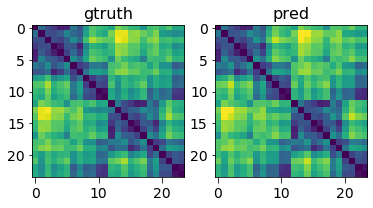

In [19]:
samples = np.load('sindhu/project1_aligned/24x24/results/sars-mers-cov2-samples.npz')
frame = 0
plt.figure()
plt.subplot(1,2,1)
plt.imshow(samples['gtruth'][frame,:,:].astype('float'))
plt.title('gtruth')
plt.subplot(1,2,2)
plt.imshow(samples['pred'][frame,:,:].astype('float'))
plt.title('pred')

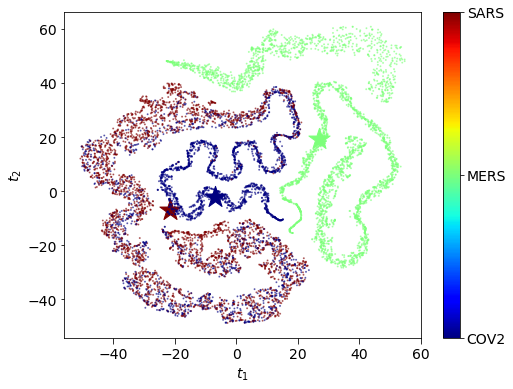

In [139]:
tsne_emb = np.load("encoded_TSNE_2D.npy")
label = np.load("label_virus.npy")
tsne_plot(tsne_emb, np.squeeze(label))

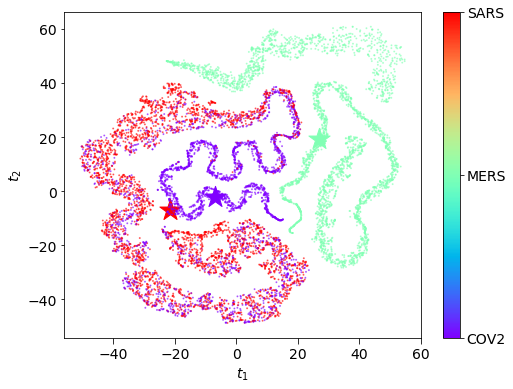

In [167]:
tsne_plot(tsne_emb, np.squeeze(label), cmap='rainbow')

In [93]:
mask_cov2 = (label == 0)
mask_mers = (label == 1)
mask_sars = (label == 2)
cov2 = tsne_emb[mask_cov2, :]
mers = tsne_emb[mask_mers, :]
sars = tsne_emb[mask_sars, :]

print(sars.shape)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(cov2)
cov2_centroid = kmeans.cluster_centers_
kmeans = KMeans(n_clusters=1, random_state=0).fit(mers)
mers_centroid = kmeans.cluster_centers_
kmeans = KMeans(n_clusters=1, random_state=0).fit(sars)
sars_centroid = kmeans.cluster_centers_

from scipy import spatial
idx_cov2 = spatial.KDTree(tsne_emb).query(cov2_centroid)[1] 
print("cov2: ", idx_cov2, tsne_emb[idx_cov2], cov2_centroid)
idx_mers = spatial.KDTree(tsne_emb).query(mers_centroid)[1] 
print("mers: ", idx_mers, tsne_emb[idx_mers], mers_centroid)
idx_sars0 = spatial.KDTree(sars).query(sars_centroid)[1] 
#print("sars: ", idx_sars0, sars[idx_sars0], sars_centroid)
idx_sars = spatial.KDTree(tsne_emb).query(sars[idx_sars0])[1] 
print("sars: ", idx_sars, tsne_emb[idx_sars], sars[idx_sars0])


(3352, 2)
cov2:  [6615] [[-6.932281  -2.0951266]] [[-7.1377892 -2.4586005]]
mers:  [2482] [[26.98586  19.235018]] [[27.346714 19.146008]]
sars:  [1375] [[-21.632055   -7.0641994]] [[-21.632055   -7.0641994]]


[[-31.008572   -1.3470979]
 [-10.15027    26.397535 ]
 [ 28.320602   -1.9036617]
 [ -3.8582754 -29.661192 ]
 [ 27.18224    39.323715 ]]


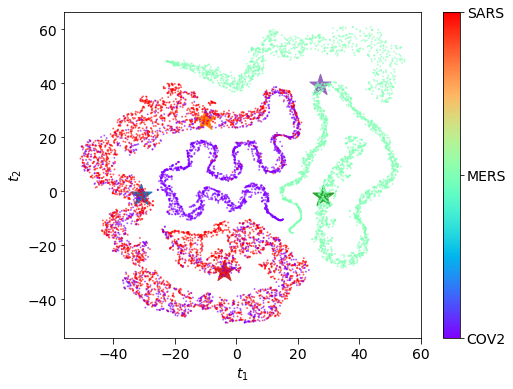

centorid:  [1690 3678 9636] [[-31.015238   -1.4831209]
 [-31.207905   -1.3658111]
 [-30.783016   -1.2277061]] [-31.008572   -1.3470979]
centorid:  [7785 5208  365] [[-10.354457  26.460815]
 [-10.800056  26.23668 ]
 [-10.374996  25.753813]] [-10.15027   26.397535]
centorid:  [ 585 8033 2617] [[28.281494  -1.9251397]
 [28.19519   -2.0997012]
 [28.09725   -2.089286 ]] [28.320602  -1.9036617]
centorid:  [7359 6069 1257] [[ -3.6835132 -29.754652 ]
 [ -4.0412226 -29.574932 ]
 [ -3.443371  -29.75425  ]] [ -3.8582754 -29.661192 ]
centorid:  [9042 4346 8723] [[27.270708 39.15629 ]
 [27.038244 39.023388]
 [26.835474 39.45426 ]] [27.18224  39.323715]


In [184]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tsne_emb)
centroids = kmeans.cluster_centers_
print(centroids)
def tsne_plot(x_pred_encoded, y_train,centroids=None, cmap="jet", clabel="Virus type"):
    Dmax = y_train;
    [n,s] = np.histogram(Dmax, 11);
    d = np.digitize(Dmax, s);
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    set_tick_font_size(ax, 14)
    cmi = plt.get_cmap(cmap);
    cNorm = mpl.colors.Normalize(vmin=min(Dmax), vmax=max(Dmax));
    scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cmi);
    
    for centroid in centroids:
        ax.scatter(centroid[0],centroid[1], marker='*',s=500)

    x = x_pred_encoded[:,0]
    y = x_pred_encoded[:,1]
    
    ax.scatter(x, y, c=scalarMap.to_rgba(Dmax), marker="o", s=1, alpha=0.5)
    ax.set_xlabel("$t_1$", fontsize=14)
    ax.set_ylabel("$t_2$", fontsize=14)
    scalarMap.set_array(Dmax);
    cbar = plt.colorbar(scalarMap);
    cbar.ax.tick_params(labelsize=14) 
    

    
    if clabel=="Virus type":
        cbar.set_ticks([0,1,2])
        cbar.set_ticklabels(["COV2", "MERS", "SARS"])
    else:
        cbar.set_label(label=clabel,fontsize=14)
    plt.savefig('2d_tsne_full_%s.png'%clabel,format='png',dpi=300, bbox_inches='tight')
    plt.show()
    
tsne_plot(tsne_emb, np.squeeze(label), centroids=centroids, cmap='rainbow')  

for i, centroid in enumerate(centroids):
        idx = spatial.KDTree(tsne_emb).query(centroid, k=3)[1] 
        print("centorid: ",idx, tsne_emb[idx], centroid)

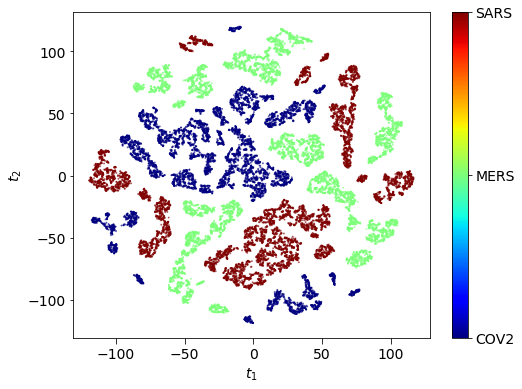

In [6]:
tsne_emb = np.load("full/encoded_TSNE_2D.npy")
label = pd.read_csv('full/label_val.txt', header=None, delim_whitespace=True).iloc[:, 0]
tsne_plot(tsne_emb, np.squeeze(label))

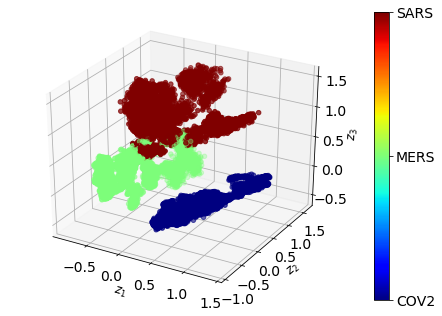

In [7]:
import pandas as pd
label = pd.read_csv('full/label_val.txt', header=None, delim_whitespace=True).iloc[:, 0]
cm_emb = np.load('full/sars-mers-cov2-embeddings.npy', 'r')
cm_emb = np.squeeze(cm_emb)
start=0 
end=cm_emb.shape[0]
scatter3d(cm_emb[start:end,0], cm_emb[start:end,1], 
          cm_emb[start:end,2], label[start:end], clabel="Virus Type")